# Chapter 4 Lab 2

## Goal

Here we will follow the same process as in Lab 1 of this chapter. However, this time we have a mix of numeric and categorical features to deal with: "skill level" and 'gender". "Gender" has been added to allow you to practice with more than just one categorical feature. "Skill Level" can take any of the values; -1, 0, 1, 2. That may seem numeric, but it is not since the distance between each is not consistent.

While R has some powerful tools for handling mixed data, Python packages for handling mixed data are growing as well. In the case of prepping the data for analysis, Python is easy - it can tell that the data is mixed by the column types. On the other hand, many of these libraries do not lend themselve to easy visualization - you have to access your model's appropriate attributes and build the visualization. 

Python's PCA package will allow you to call some simple graphs - but we've moved beyond simple PCA. We will use a package called "prince" which handles several types of component analysis. In this case, we will use "FAMD" - Factor Analysis of Mixed Data. We will have to access the attributes to produce a graph equivalent to the graph in the R lab.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pca import pca
import prince

First, read in the data. "SkillLevel" is actually " SkillLevel". We will ignore the whitespace and not correct it for this lab.

In [86]:
dota_dfm1 = pd.read_csv("Dota_normalized_mixed.csv")
dota_dfm1.head()

,GamesPlayed,GamesWon,GamesLeft,Ditches,Points,Kills,KillsPerMin,Deaths,Assists,CreepsKilled,CreepsDenied,NeutralsKilled,TowersDestroyed,RaxsDestroyed,TotalTime,SkillLevel,Gender
0,0.141363,0.140590,0.150,0.333333,0.350240,0.095653,0.285714,0.111196,0.122158,0.104007,0.069642,0.080559,0.136486,0.132340,0.259791,1,F
1,0.020602,0.022109,0.000,0.000000,0.262429,0.015711,0.309524,0.026489,0.021663,0.012018,0.011797,0.010606,0.018839,0.020158,0.039233,1,F
2,0.000634,0.000000,0.000,0.000000,0.269743,0.000463,0.261905,0.001648,0.000523,0.000475,0.000228,0.000163,0.000000,0.000000,0.001125,0,M
3,0.031379,0.033447,0.125,0.055556,0.434886,0.045447,0.619048,0.026372,0.027159,0.037422,0.042929,0.033030,0.050750,0.031551,0.057959,1,F
4,0.000000,0.000567,0.000,0.000000,0.284200,0.000379,0.666667,0.000118,0.000291,0.000078,0.000182,0.000070,0.000000,0.000000,0.000139,0,M


Then, we change the column data types for " SkillLevel" and "Gender" to categorical

In [87]:
dota_dfm1[" SkillLevel"] = pd.Categorical(dota_dfm1[" SkillLevel"])
dota_dfm1["Gender"] = pd.Categorical(dota_dfm1["Gender"])
dota_dfm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0    GamesPlayed      867 non-null    float64 
 1    GamesWon         867 non-null    float64 
 2    GamesLeft        867 non-null    float64 
 3    Ditches          867 non-null    float64 
 4    Points           867 non-null    float64 
 5    Kills            867 non-null    float64 
 6    KillsPerMin      867 non-null    float64 
 7    Deaths           867 non-null    float64 
 8    Assists          867 non-null    float64 
 9    CreepsKilled     867 non-null    float64 
 10   CreepsDenied     867 non-null    float64 
 11   NeutralsKilled   867 non-null    float64 
 12   TowersDestroyed  867 non-null    float64 
 13   RaxsDestroyed    867 non-null    float64 
 14   TotalTime        867 non-null    float64 
 15   SkillLevel       867 non-null    category
 16  Gender            867 non-

And that's it! We can now begin working with the prince FAMD model.

First, let's fit a model with 20 components and see the summary.

In [89]:
famd1 = prince.FAMD(n_components=20, engine='sklearn')
famd1 = famd1.fit(dota_dfm1)
famd1.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,11.937,59.68%,59.68%
1,1.256,6.28%,65.96%
2,1.133,5.66%,71.63%
3,1.052,5.26%,76.89%
4,1.009,5.04%,81.93%
5,0.984,4.92%,86.85%
6,0.727,3.63%,90.48%
7,0.563,2.82%,93.30%
8,0.472,2.36%,95.66%


It looks like only 6 components are ideal. Let's use only 6 components.

In [128]:
famd1 = prince.FAMD(n_components=6, engine='sklearn')
famd1 = famd1.fit(dota_dfm1)
famd1.row_coordinates(dota_dfm1).head(6)

component,0,1,2,3,4,5
0,5.447351,-0.069446,-0.835622,-1.093934,-1.135079,0.952515
1,-0.498361,-0.544310,-0.003740,-0.478049,-1.007316,0.790269
2,-1.628336,0.560289,0.213909,0.357629,0.564302,-0.567855
3,1.276827,-2.659323,0.373191,-0.332987,-0.605579,0.722337
4,-1.399876,-1.186632,0.309946,0.797718,0.695720,-0.669067
5,-1.389392,0.588458,0.118584,0.462024,0.483548,-0.573880


## Plotting

The plot will link the variables and principle components. 

First, we fit the famd model to only 2 components since our axis will only have 2 axes (x and y) of course!

In [187]:
famd_axis = prince.FAMD(n_components=2, engine='sklearn')
famd_axis = famd_axis.fit(dota_dfm1)
famd_axis = famd_axis.row_coordinates(dota_dfm1)
famd_axis = famd_axis.drop([380]).reset_index(drop=True)
famd_axis

component,0,1
0,5.447351,-0.069442
1,-0.498361,-0.544309
2,-1.628336,0.560289
3,1.276827,-2.659323
4,-1.399876,-1.186632
...,...,...
861,-1.566834,-0.035659
862,-1.422498,1.000935
863,-1.736665,1.239561
864,1.083536,-2.943818


Next, we take the loadings and square them to produce what R's PCAmix calls "sqload".  You can see the loadings at the end of the lab.

In [214]:
famd2 = prince.FAMD(n_components=17, engine='sklearn')
famd2 = famd2.fit(dota_dfm1)
famd_loads = famd2.column_coordinates_
famd2 = famd_loads **2
famd2 = famd2.reset_index(drop=True)

Lastly, we plot the squared loadings against the 2 PC dims. This results in a similar graph produced in the R labs.

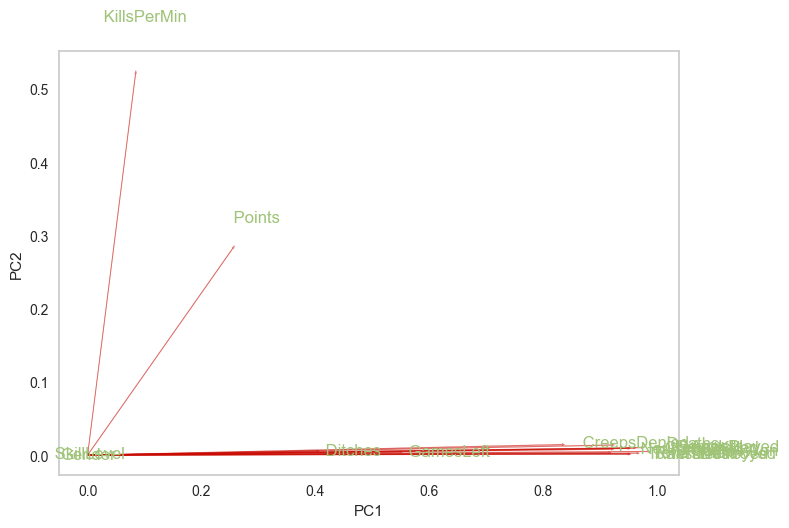

In [215]:
def myplot(score,coeff,labels=None):
    xs = score[0]
    ys = score[1]
    n = coeff.shape[0]
    
    #plt.scatter(xs ,ys)
    for i in range(17):
        plt.arrow(0, 0, coeff.loc[i,0], coeff.loc[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff.loc[i,0]* 1.15, coeff.loc[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff.loc[i,0]* 1.15, coeff.loc[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. 
names = list(dota_dfm1.columns.values)
myplot(famd_axis, famd2, names) 
plt.show()

As you can see, most of the numerical variables are closely linked to the first component, while the two categorical variables ("Gender" is hidden behind " SkillLevel" near the origin) are linked to both. "KillsPerMin" are almost orthogonal to PC1 and closer to PCA2.

Lastly, as promised, here are the loadings. The categorical loadings are different than in the R lab, but the conclusions are the same.

You could now use these models to produce a set of PCs that you could use as you did in Lab 1.

In [218]:
famd1.column_coordinates_

component,0,1,2,3,4,5
variable,,,,,,
GamesPlayed,0.986008,0.101005,-0.032997,0.015294,-0.036977,0.000092
GamesWon,0.991742,0.070525,-0.010316,0.014396,-0.011408,-0.013037
GamesLeft,0.740336,-0.062636,-0.138270,-0.001338,-0.069615,0.065918
Ditches,0.634576,-0.074352,-0.286096,-0.265832,0.001079,0.076997
Points,0.505055,-0.531528,0.308111,-0.097530,0.230185,-0.039272
Kills,0.981945,0.051167,0.027656,0.036257,0.009727,-0.026661
KillsPerMin,0.290117,-0.721546,0.018836,0.181185,0.035471,-0.036242
Deaths,0.959357,0.117042,-0.068060,0.007017,-0.057399,0.009933
Assists,0.978808,0.098281,-0.023857,0.004248,-0.015293,-0.010034
